# Import Libraries


In [22]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
from torchvision import datasets, models, transforms
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tqdm.auto import tqdm
import os

## For Google Colab Users

This cell is for mounting your Google Drive to the Colab Notebook. If you are not using Google Colab, you can skip this cell


In [23]:
# from google.colab import drive
# drive.mount('/content/drive')

In [24]:
# Check for GPU
device = "cuda" if torch.cuda.is_available() else "cpu"

# Check for GPU in mac
# device = "mps" if torch.backends.mps.is_available() else "cpu"

device

'cuda'

# Data


## Transforming Data


In [25]:
data_transforms = {

    'Training': transforms.Compose([
        transforms.RandomResizedCrop((224, 224)),
        transforms.RandomHorizontalFlip(),
        transforms.ToTensor()
    ]),
    'Testing': transforms.Compose([
        transforms.Resize((224, 224)),
        transforms.ToTensor()

    ])
}

## Loading Data


In [26]:
# directory: where training and testing data are

base_path = os.getcwd()
data_dir = os.path.join(base_path, 'dataset')
# START CODE HERE

# datasets.ImageFolder: (https://pytorch.org/vision/main/generated/torchvision.datasets.ImageFolder.html)
# torch.utils.data.DataLoader: (https://pytorch.org/docs/stable/data.html#torch.utils.data.DataLoader)

# image_datasets are dictionary of (type of dataset, dataloader)
# type of dataset are training and testing
image_datasets = {x: datasets.ImageFolder(
    os.path.join(data_dir, x), data_transforms[x]) for x in data_transforms.keys()}

# DataLoader helps us for better performance and experience in data loading
dataloaders = {x: torch.utils.data.DataLoader(
    image_datasets[x], batch_size=32, shuffle=True) for x in data_transforms.keys()}
# END CODE HERE

dataset_sizes = {x: len(image_datasets[x]) for x in data_transforms.keys()}
class_names = image_datasets['Training'].classes

dataset_sizes, class_names

({'Training': 2770, 'Testing': 394},
 ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor'])

## Samples of data


C:\Users\srsjd\AppData\Local\Temp\ipykernel_10928\1845635306.py:5: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  plt.subplot(4, 8, i + 1)


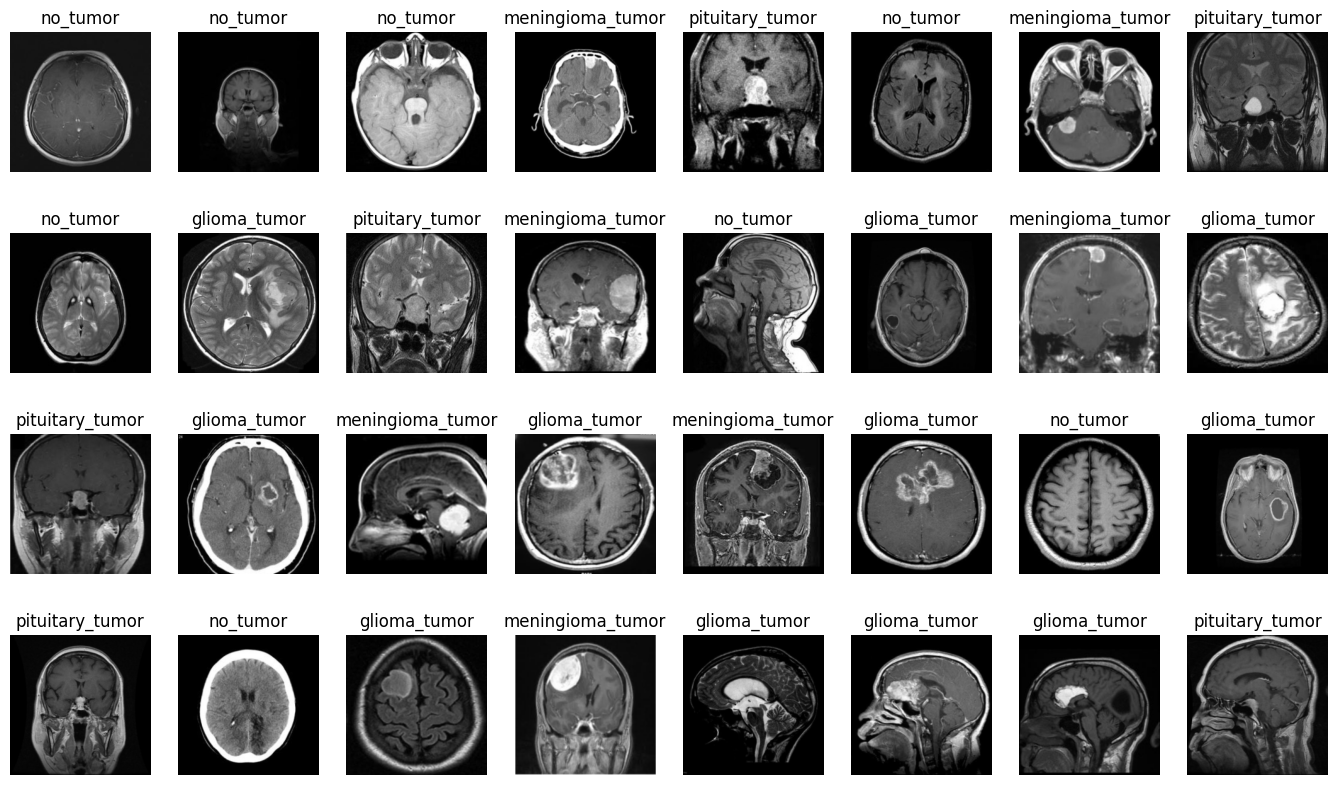

In [27]:
samples, labels = next(iter(dataloaders["Testing"]))
plt.figure(figsize=(17, 10))
plt.axis("off")
for i in range(32):
    plt.subplot(4, 8, i + 1)
    plt.imshow(samples[i].permute(1, 2, 0))
    plt.title(class_names[labels[i]])
    plt.axis("off")

# Model


## Loading Model


In [28]:
# Loading are pretrained model in this task our model is resnet50 (https://www.youtube.com/watch?v=mGMpHyiN5lk)
# START CODE HERE

# Loading pretrained model
model = models.resnet50(pretrained=True)
for param in model.parameters():
    param.requires_grad = False
# END CODE HERE
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

## Preparing Model


In [29]:
# START CODE HERE

# You have to change the (fc) layer of the model to compatible with your data
model.fc = nn.Linear(2048, 4)

# END CODE HERE
model = model.to(device)
model

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

# Training


## Loss function


In [30]:
criterion = nn.CrossEntropyLoss()

## Optimizer


In [31]:
# you have to change it for better performance
optimizer = optim.NAdam(model.parameters(), lr=0.75)

## Others


In [32]:
# you can have other thongs like learning rate scheduler and ...
LR = 10
def fn(x):
    global LR
    LR*=0.965
    return LR
scheduler = optim.lr_scheduler.LambdaLR(
    optimizer, lr_lambda=fn)
def check(data, model):
    corrects = 0

    # for testing part you have to set model to eval mode
    model.eval()
    for inputs, labels in dataloaders[data]:
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            #_, preds = None
            preds = torch.argmax(outputs, 1)
            corrects += torch.sum(preds == labels.data)
    return corrects.double() / dataset_sizes[data]

## Train


In [33]:
### START CODE HERE

losses = []
EPOCH = 80

# for training part you have to set model to train mode
model.train()

# loop on epochs
for e in tqdm(range(EPOCH)):
  sum = 0
  ln = len(image_datasets['Training'])
  # loop on batches
  for inputs, labels in dataloaders['Training']:
    inputs = inputs.to(device)
    labels = labels.to(device)

    # set the grad to zero
    optimizer.zero_grad()
    
    # forward part
    # hint: using of pytorch max method (https://pytorch.org/docs/stable/generated/torch.max.html)
    #outputs = torch.nn.functional.log_softmax(model(inputs), dim=1)
    outputs = model(inputs)
    
    #_, preds = None
    preds = torch.argmax(outputs, 1)
    sum += torch.sum(preds != labels)

    #  compute loss
    loss = criterion(outputs, labels)
    
    # backward part
    loss.backward()

    # update parameters
    optimizer.step()
  
  scheduler.step()
  if check('Testing', model) >= 0.71:
      break
  # you have to append loss for each epoch
  losses.append((sum/ln).item())
### END CODE HERE

 91%|█████████▏| 73/80 [26:05<02:30, 21.45s/it]


## Plot loss function


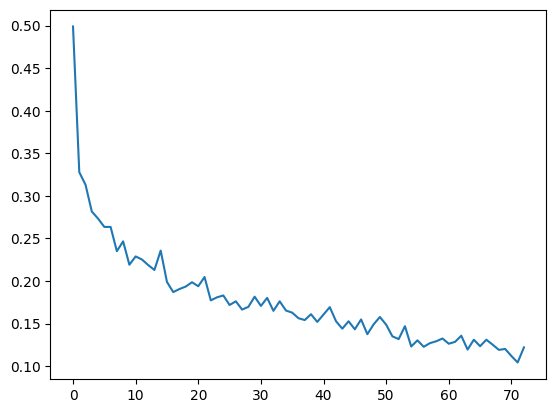

In [34]:
# you have to calculate losses arrayin Train part
plt.plot(list(range(len(losses))), losses)
plt.show()

## Evaluate model


In [35]:
# START CODE HERE

def calc_accuracy(data, model):
    corrects = 0

    # for testing part you have to set model to eval mode
    model.eval()
    for inputs, labels in tqdm(dataloaders[data]):
        inputs = inputs.to(device)
        labels = labels.to(device)

        with torch.no_grad():
            outputs = model(inputs)
            #_, preds = None
            preds = torch.argmax(outputs, 1)
            corrects += torch.sum(preds == labels.data)
    return corrects.double() / dataset_sizes[data]

# END CODE HERE

In [36]:
# accuracy of training data
calc_accuracy('Training', model).item()

100%|██████████| 87/87 [00:19<00:00,  4.53it/s]


0.8902527075812274

In [ ]:
# accuracy of testing data
calc_accuracy('Testing', model).item()

100%|██████████| 13/13 [00:02<00:00,  4.65it/s]


0.7182741116751269

# Saving Model


In [44]:
PATH = os.path.join(base_path, "model.ci")
torch.save(model, PATH)

# Loading and eval Model


In [45]:
# START CODE HERE

model_for_eval = torch.load(PATH)
model_for_eval.to(device)

# END CODE HERE

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [40]:
model_for_eval

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [46]:
# accuracy of training data by loadded model
calc_accuracy('Training', model_for_eval)

100%|██████████| 87/87 [00:19<00:00,  4.50it/s]


tensor(0.8949, device='cuda:0', dtype=torch.float64)

In [47]:
# accuracy of testing data by loadded model
calc_accuracy('Testing', model_for_eval)

100%|██████████| 13/13 [00:02<00:00,  4.54it/s]


tensor(0.7183, device='cuda:0', dtype=torch.float64)